We first create a 10000 array of pion momentum values sampled from a uniform distribution ranging from 0.2-5.0 GeV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

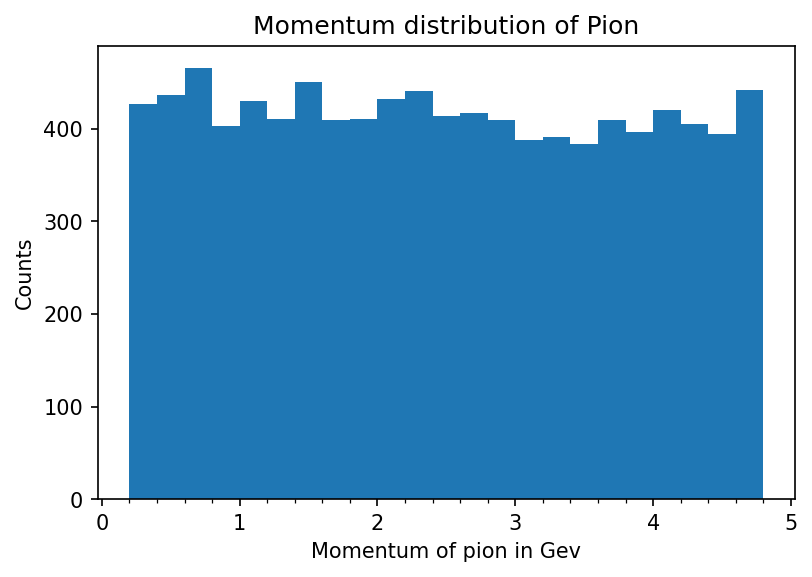

In [2]:
np.random.seed(2)
p_range= np.random.uniform(0.2,5.0,10000)
bins=np.arange(0.2,5.0,0.2)

plt.figure(dpi=150)
plt.hist(p_range,bins=bins)
plt.xlabel('Momentum of pion in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Momentum distribution of Pion')
plt.show()

Given the mass of the pion to be 0.14 GeV, the energy of the pion is obtained from the momentum through the relation $E= \sqrt{p^2+m^2}$. THe corresponding distribution is plotted and a linear fit is performed

In [3]:
def E_fit(x,m,c):
    return m*x+c 

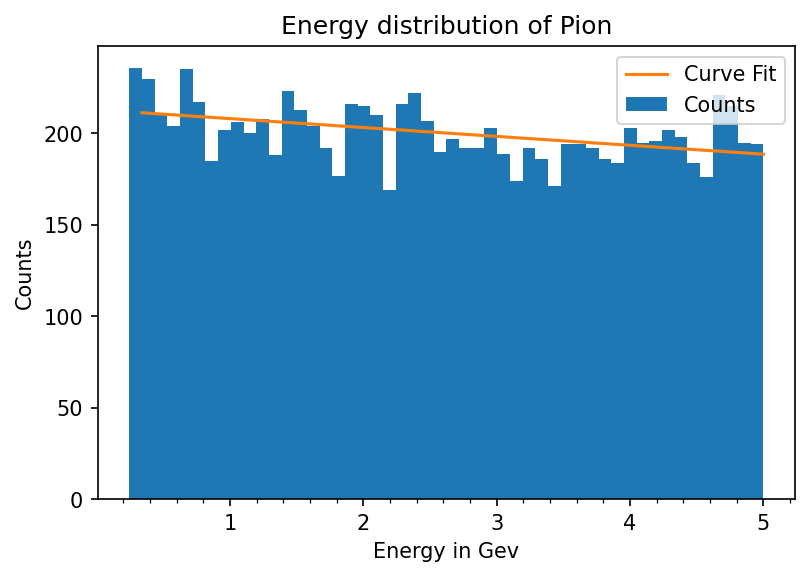

In [4]:
m_pi=0.14
nbins=50
E_range= np.sqrt(p_range**2+ m_pi**2)

plt.figure(dpi=150)
counts,bins,ignored= plt.hist(E_range,nbins, label='Counts')

plt.xlabel('Energy in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

param, param_cov = curve_fit(E_fit, bins[1:], counts)
plt.plot(bins[1:],E_fit(bins[1:],param[0],param[1]),label='Curve Fit')
perr=np.sqrt(np.diag(param_cov))

plt.title('Energy distribution of Pion')
plt.legend()
plt.show()

In the COM frame, consider one photon to be emitted along the direction ($\theta,\phi$). The other photon is emitted along ($-\theta,-\phi$). From energy-momentum conservation, the 4-momentum of the first photon takes the form
$$\begin{pmatrix}
m_\pi/2\\
m_\pi\cos\theta/2\\
m_\pi\sin\theta\cos\phi/2\\
m_\pi\sin\theta\sin\phi/2
\end{pmatrix}$$

If we Lorentz boost along the x-axis to the lab-frame where the pion is travelling with speed $\beta$, the 4-momentum of the photon becomes
$$\begin{pmatrix}
\gamma m_\pi/2(1+\beta \cos\theta)\\
\gamma m_\pi/2(\beta+ \cos\theta)\\
m_\pi\sin\theta\cos\phi/2\\
m_\pi\sin\theta\sin\phi/2
\end{pmatrix}$$
Thus, the energies of the two photons are:
$$E_1,E_2= \gamma m_\pi/2 (1\pm \beta \cos\theta)$$
Also, we have the following relations:
$$\gamma m_\pi \beta = p_\pi$$
$$\gamma= \sqrt{1+p_\pi^2/m_\pi^2}$$
$$\beta= \frac{1}{\sqrt{1+m_\pi^2/p_\pi^2}}$$

We use the following relations and sample $\cos\theta$ from a uniform distribution as this $\theta$ was the angle in COM frame

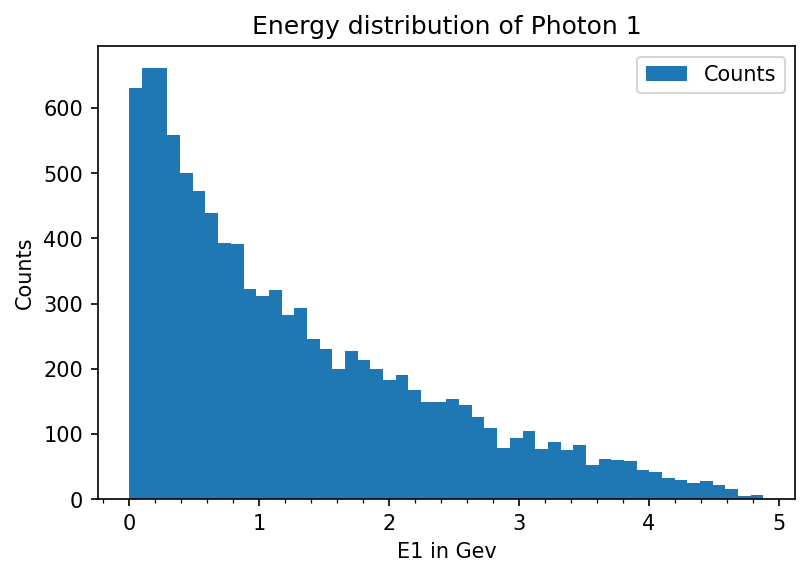

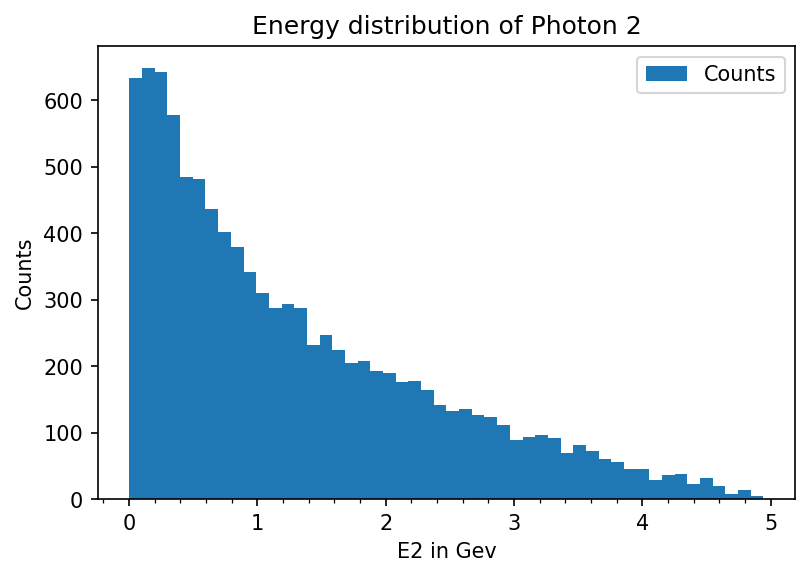

In [5]:
np.random.seed(1)
#gamma_beta=p_range/m_pi
gamma=np.sqrt(1+(p_range/m_pi)**2)
beta= 1.0/(np.sqrt(1.0 + (m_pi/p_range)**2))

cos_theta=np.random.uniform(-1,1,10000)

E1= gamma*(m_pi/2)*(1+ beta*cos_theta)
E2= gamma*(m_pi/2)*(1- beta*cos_theta)

plt.figure(dpi=150)
counts,bins,ignored= plt.hist(E1,nbins, label='Counts')

plt.xlabel('E1 in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Energy distribution of Photon 1')
plt.legend()
plt.show()

plt.figure(dpi=150)
counts,bins,ignored= plt.hist(E2,nbins, label='Counts')

plt.xlabel('E2 in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Energy distribution of Photon 2')
plt.legend()
plt.show()

Due to the detector there's a 5% energy resolution for the measured photon energies. Thus, for each photon energy, we randomly choose a new energy from a normal distribution of 5% width about that photon energy, and call it the "measured" photon energy.

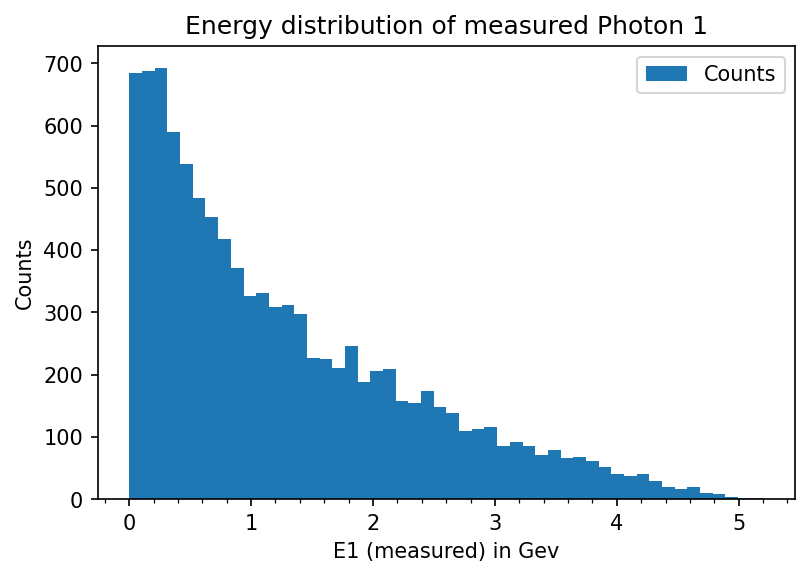

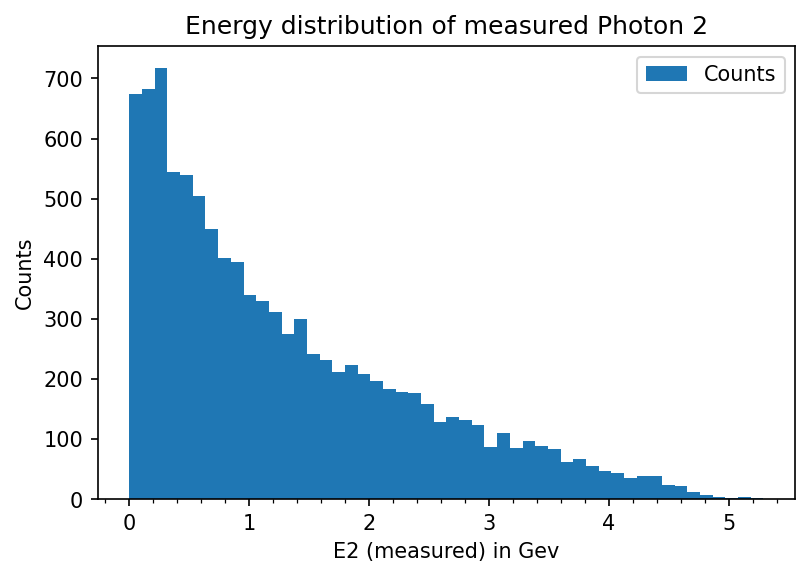

In [6]:
np.random.seed(2)
#measured energies
E1_measured= np.random.normal(loc=E1,scale=0.05*E1)
E2_measured= np.random.normal(loc=E2,scale=0.05*E2)

plt.figure(dpi=150)
counts,bins,ignored= plt.hist(E1_measured,nbins, label='Counts')

plt.xlabel('E1 (measured) in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Energy distribution of measured Photon 1')
plt.legend()
plt.show()


plt.figure(dpi=150)
counts,bins,ignored= plt.hist(E2_measured,nbins, label='Counts')

plt.xlabel('E2 (measured) in Gev')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Energy distribution of measured Photon 2')
plt.legend()
plt.show()

The invariant mass of the pion is given by the expression:
$$m_\pi= \sqrt{E_\pi^2-p_\pi^2}$$
Now, what is measured in the lab frame is the energies of the two photons $E_1$ and $E_2$, and we know that $E_\pi=E_1+E_2$.

We already know the momenta of the pion as these were the events generated. We thus get a distribution of the invariant mass of the pion

<ipython-input-7-46c995eccbfd>:3: RuntimeWarning: invalid value encountered in sqrt
  m_pi_dist= np.sqrt(E_pion**2-p_range**2)


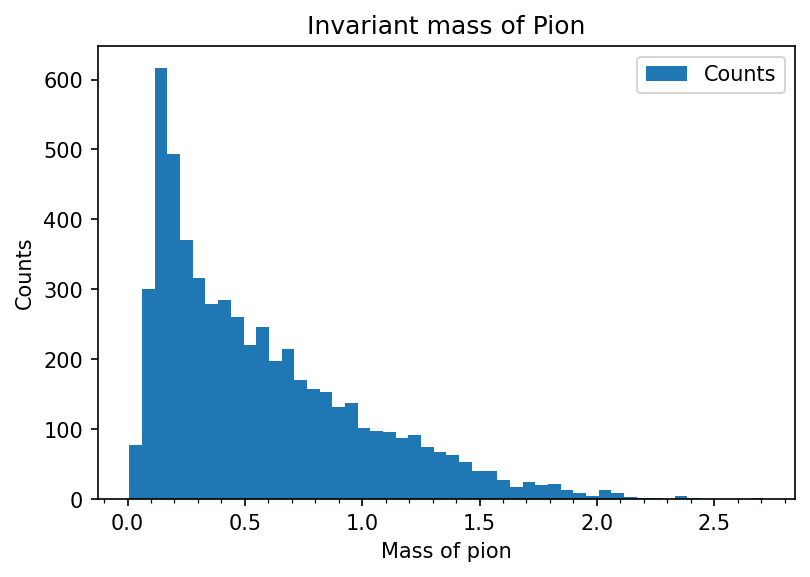

Most probable pion mass:  0.17002123688377088 GeV
Width of distribution:  0.43488910404491143 GeV


In [7]:
#getting invariant mass of pion
E_pion= E1_measured+E2_measured #in lab frame
m_pi_dist= np.sqrt(E_pion**2-p_range**2)

m_pi_dist = m_pi_dist[np.logical_not(np.isnan(m_pi_dist))] #removes nan values

plt.figure(dpi=150)
counts,bins,ignored= plt.hist(m_pi_dist,nbins, label='Counts')

plt.xlabel('Mass of pion')
plt.ylabel('Counts')
plt.minorticks_on()
plt.tick_params(axis='y',which='minor',left=False)

plt.title('Invariant mass of Pion')
plt.legend()
plt.show()

mp_pion= bins[np.argmax(counts)+1]
print("Most probable pion mass: ", mp_pion, "GeV")
print("Width of distribution: ", np.std(m_pi_dist), "GeV")
#print(E_pion)

As we can see, due to detector noise, we get a distribution of pion mass peaked close to 0.14 GeV with some width.